# Prévisualisation

La prévisualisation de données permet au data scientist d'explorer facilement les données et d'en avoir une représentation. Cette étape à pour but de faire gagner du temps sur la modélisation. 

In [1]:
from IPython.display import Math
from IPython.display import Latex
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importer le dataset 
dataset = pd.read_csv('../data/listings_final.csv', sep=';')

In [3]:
#toujours regarder la tete de données 
dataset.head() 

,Unnamed: 0,listing_id,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1,1,1,2.0,False,True,True,False,False,1.00,1.00
1,1,661961,studio PARIS PLACE EDITH PIAF 75020,entire_home,Paris,NaN,48.867284,2.403255,2,1,1,1.0,False,False,True,True,False,0.88,0.69
2,2,1261705,chambre privée à louer @ paris oberkampf,private_room,Paris,NaN,48.867894,2.375897,1,1,1,1.0,False,False,True,True,False,1.00,1.00
3,3,1318834,Appartement au coeur du Marais,entire_home,Paris,République,48.870370,2.358510,3,2,2,1.0,False,False,True,False,False,0.82,0.48
4,4,1677091,Lovely & Quiet flat,entire_home,Paris,Buttes-Chaumont - Belleville,48.874149,2.373700,2,1,1,1.0,False,False,True,True,False,0.95,0.90


## Prévisualisation des données clean

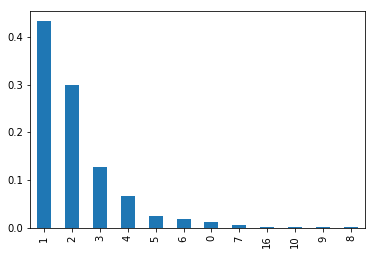

In [4]:
#nombre de beds
dataset['beds'].value_counts(normalize=True).plot(kind='bar')
plt.show() 

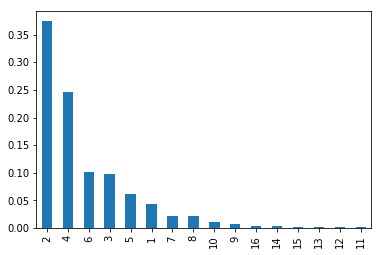

In [5]:
#capacité du logement 
dataset['person_capacity'].value_counts(normalize=True).plot(kind='bar') 

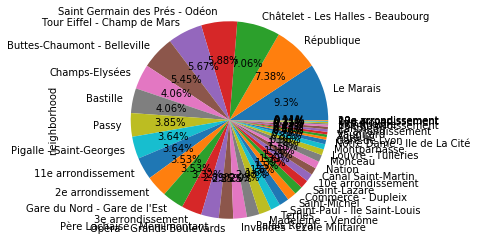

In [6]:
#la répartition suivant les quartiers 
dataset["neighborhood"].value_counts(normalize=True).plot(kind='pie',autopct = lambda x: str(round(x, 2)) + '%')
#cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

On ne peut pas tirer grand chose sur ce graphique il faudra donc trouver une visualisation plus parlante ! 

*Pourquoi pas un mapping.* 

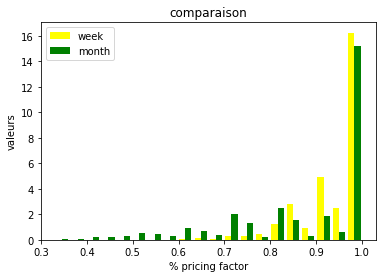

In [7]:
#comparaison entre pricing_weekly_factor & pricing_monthly_factor
plt.hist([dataset['pricing_weekly_factor'], dataset['pricing_monthly_factor']], 
         normed=True,bins=20, color = ['yellow', 'green'], label = ['week', 'month'])
plt.ylabel('valeurs')
plt.xlabel('% pricing factor')
plt.title('comparaison')
plt.legend()
plt.show()

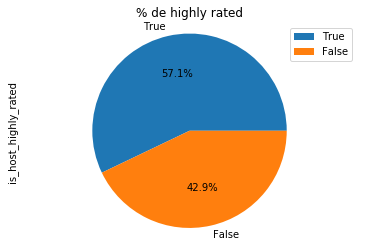

In [8]:
dataset['is_host_highly_rated'].value_counts(normalize=True).plot(kind='pie',autopct = lambda x: str(round(x, 2)) + '%')
plt.axis('equal') 
plt.title('% de highly rated')
plt.legend()
plt.show() 

In [9]:
#définition d'une variable de travail 
X = dataset[["person_capacity", "beds", "bedrooms", "bathrooms"]]
X.describe()

,person_capacity,beds,bedrooms,bathrooms
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.668000,2.056000,1.326000,1.230500
std,2.190108,1.501039,0.998359,0.524304
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000
50%,3.000000,2.000000,1.000000,1.000000
75%,4.000000,3.000000,2.000000,1.000000
max,16.000000,16.000000,6.000000,5.000000


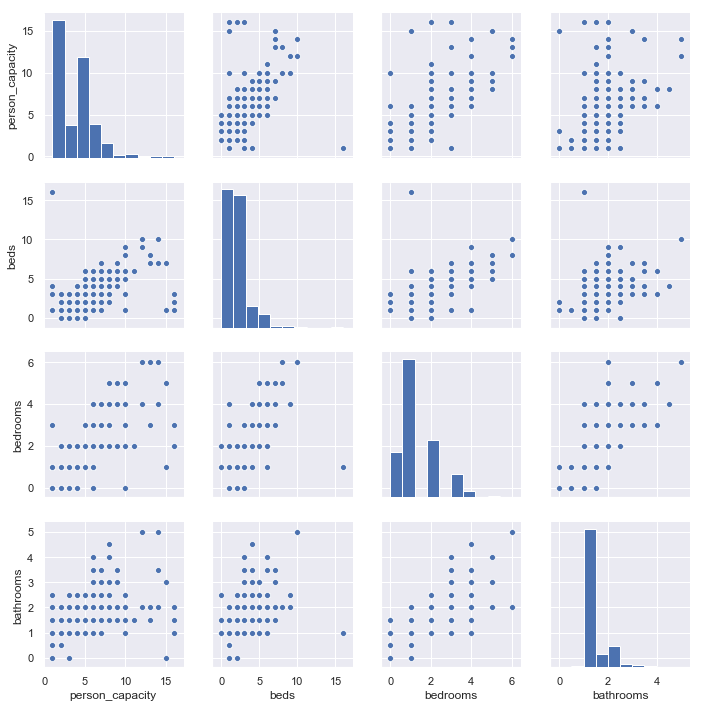

In [10]:
#comparaison 2 à 2 
sns.set()
sns.pairplot(X)

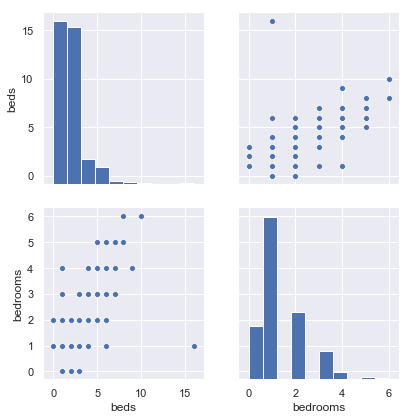

In [11]:
g = sns.pairplot(X, height=3, vars=['beds', 'bedrooms'])

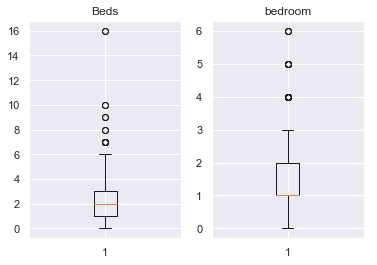

In [12]:
plt.subplot(121)
plt.boxplot(dataset['beds'])
plt.title('Beds')

plt.subplot(122)
plt.boxplot(dataset['bedrooms'])
plt.title('bedroom')

plt.show()

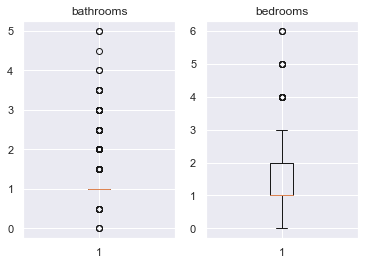

In [13]:
plt.subplot(121)
plt.boxplot(dataset['bathrooms'])
plt.title('bathrooms')

plt.subplot(122)
plt.boxplot(dataset['bedrooms'])
plt.title('bedrooms')

plt.show()

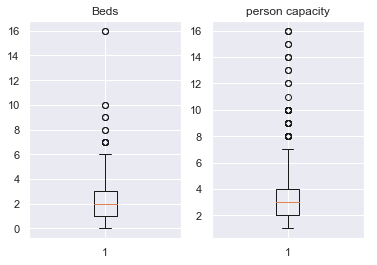

In [14]:
plt.subplot(121)
plt.boxplot(dataset['beds'])
plt.title('Beds')

plt.subplot(122)
plt.boxplot(dataset['person_capacity'])
plt.title('person capacity')

plt.show()